In [5]:
import matplotlib

import os
import numpy as np
import cPickle as pickle
from __future__ import division


import matplotlib.pyplot as plt
import matplotlib
%matplotlib notebook

from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import cPickle as pickle
from matplotlib.colors import to_rgb
from sklearn.decomposition import PCA

In [2]:
matplotlib.__version__

'2.1.2'

In [10]:
marker_dictionary = ["o", "^", "x", "*","s","p","d","$\clubsuit$","$\heartsuit$",">"]
color_dictionary = ["r", "b", "g", "blueviolet","cyan","darkorange","mediumspringgreen","darkmagenta","gray","black","fuchsia"]


===> Visualization of samples in the reduced feature space of a $\textbf{naive Cuda-convnet}$

<IPython.core.display.Javascript object>


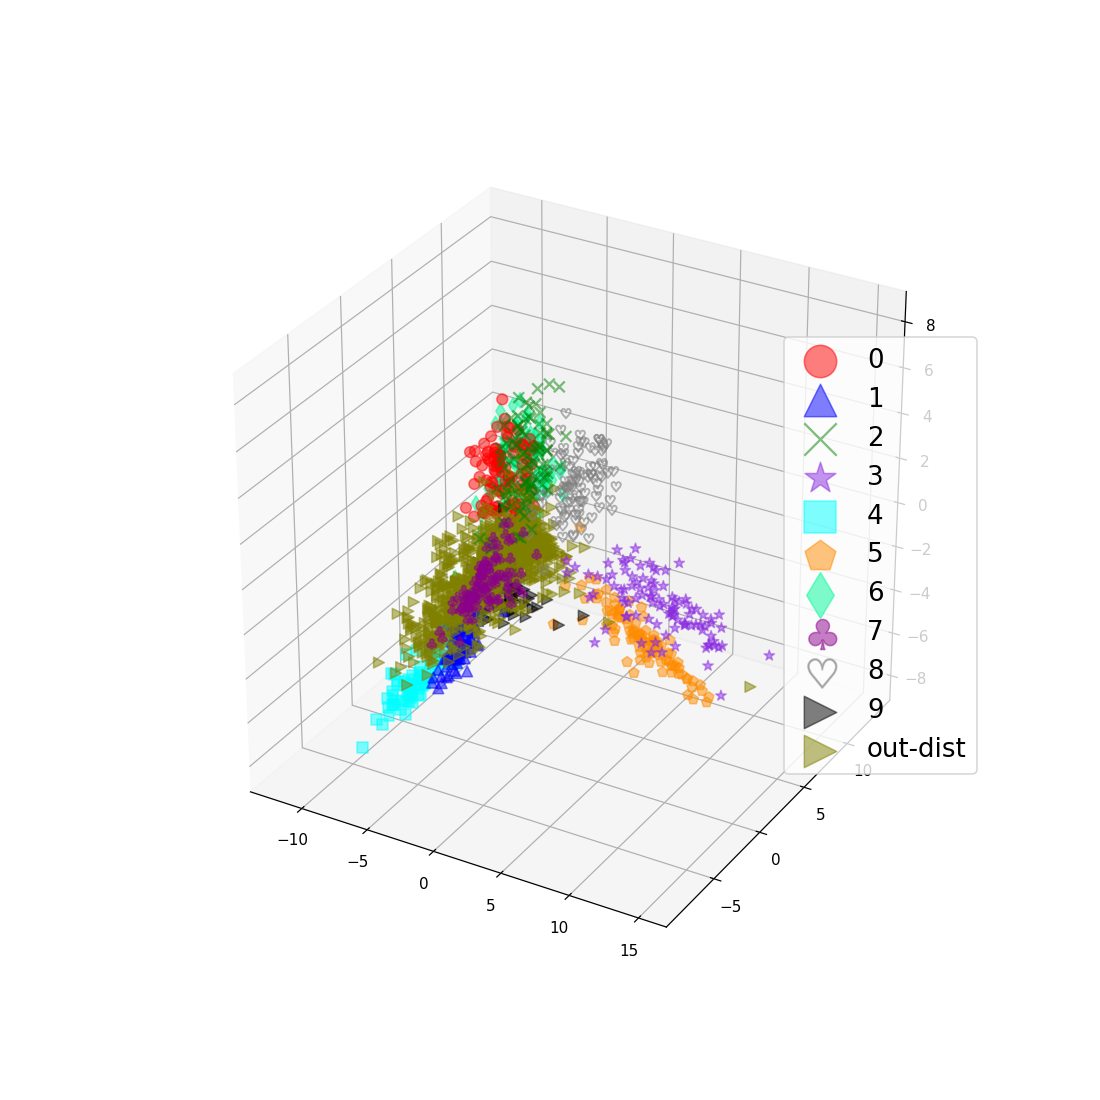

<IPython.core.display.Javascript object>


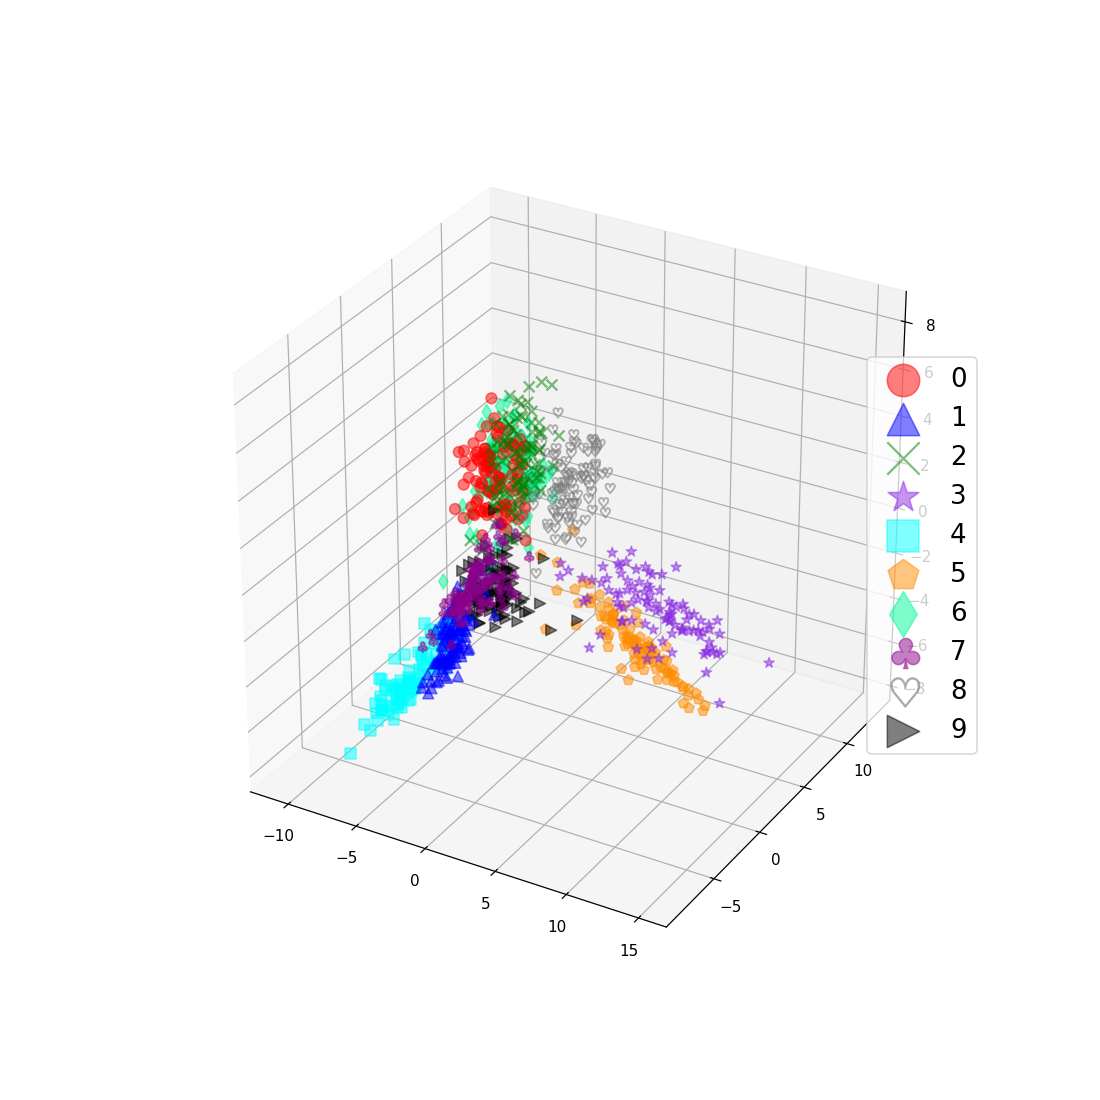

<IPython.core.display.Javascript object>


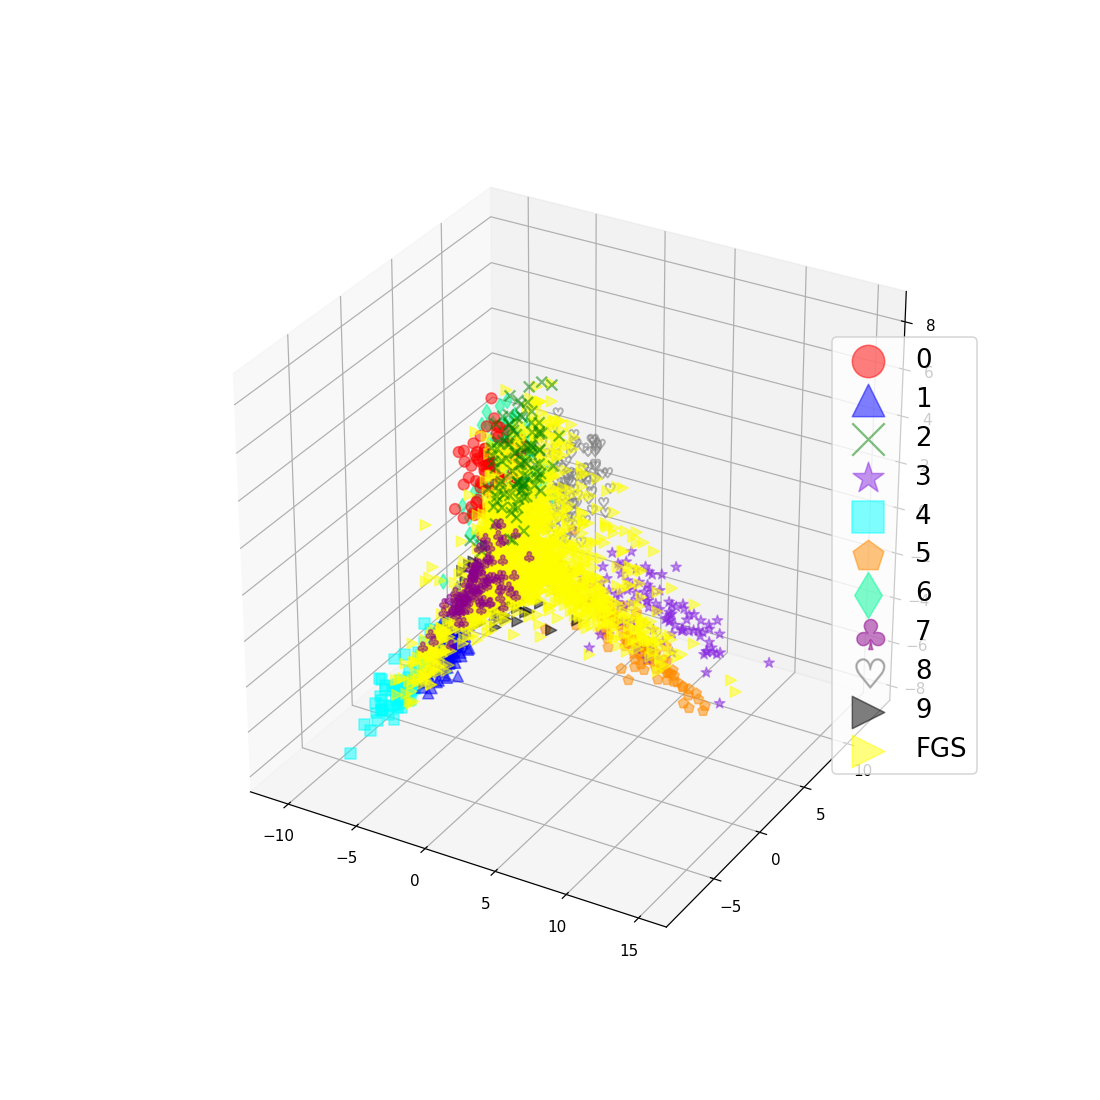

<IPython.core.display.Javascript object>


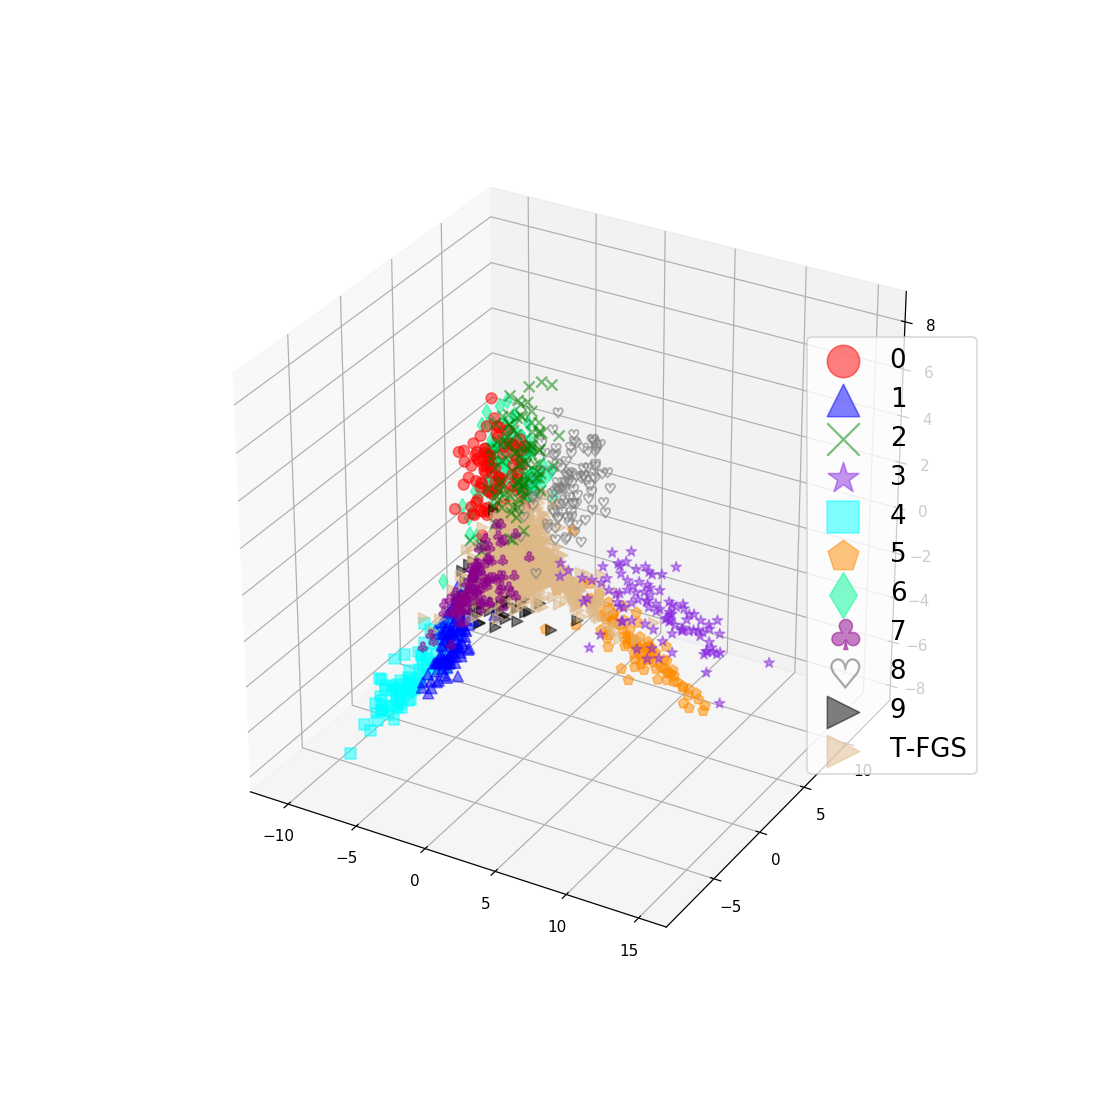

In [20]:

# Loading data 
All_cln_LCon = np.load('MNIST-featureSpace-Naive.npy')

#  obtaining principles components in the feature space from MNIST (i.e. in-distribution samples)
pca = PCA(n_components=3)
pca_fun = pca.fit(All_cln_LCon)
pca_data = pca_fun.transform(All_cln_LCon)




All_FGS_LCon = np.load('MNIST-FGS-featureSpace-Naive.npy')
All_TFGS_LCon = np.load('MNIST-TFGS-featureSpace-Naive.npy')
Dustbin = np.load('MNIST-outdist-featureSpace-Naive.npy')

pca_TFGS_naive = pca_fun.transform(All_TFGS_LCon)
pca_FGS_naive = pca_fun.transform(All_FGS_LCon)
pca_data_dustbin =pca_fun.transform(Dustbin)

# ============ Visualization of samples in the reduced feature space of naive cuda-convnet ================

#  Clean images
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
figures = []
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data[i*800:(i+1)*800:8,0],pca_data[i*800:(i+1)*800:8,1],pca_data[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label=str(i))
ax.scatter(pca_data_dustbin[:,0], pca_data_dustbin[:,1], pca_data_dustbin[:,2], c='olive',marker='>',alpha=0.5,s=50,label='out-dist')
plt.legend(fontsize=17, markerscale=3, fancybox=True,loc='center right')


#  Clean images along with out-distribution samples 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data[i*800:(i+1)*800:8,0],pca_data[i*800:(i+1)*800:8,1],pca_data[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label=str(i))
plt.legend(fontsize=17, markerscale=3, fancybox=True,loc='center right')



#  Clean images along with FGS samples

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data[i*800:(i+1)*800:8,0],pca_data[i*800:(i+1)*800:8,1],pca_data[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label=str(i))
ax.scatter(pca_FGS_naive[::4,0],pca_FGS_naive[::4,1], pca_FGS_naive[::4,2], c='yellow',marker='>', alpha=0.5,s=50, label='FGS')
plt.legend(fontsize=17, markerscale=3, fancybox=True,loc='center right')


#  Clean images along with T-FGS sampples 
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')

for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data[i*800:(i+1)*800:8,0],pca_data[i*800:(i+1)*800:8,1],pca_data[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label=str(i))
ax.scatter(pca_TFGS_naive[::4,0],pca_TFGS_naive[::4,1], pca_TFGS_naive[::4,2], c='burlywood',marker='>', alpha=0.5,s=50, label='T-FGS')
plt.legend(fontsize=17, markerscale=3, fancybox=True,loc='center right')








Visualization of samples in the reduced feature space of $\textbf{augmented version of cuda-convnet}$

In [21]:
CNNDust_LCon  = np.load ('MNIST-NotMNIST-featureSpace-AugmCNN.npy')
pca = PCA(n_components=3)
pca_fun_CNNDu = pca.fit(CNNDust_LCon)
pca_data_CNNDu = pca_fun_CNNDu.transform(CNNDust_LCon)
Dustbin = np.load('MNIST-outdist-featureSpace-AugmCNN.npy')
pca_data_dustbin_CNNDu = pca_fun_CNNDu.transform(Dustbin)

<IPython.core.display.Javascript object>


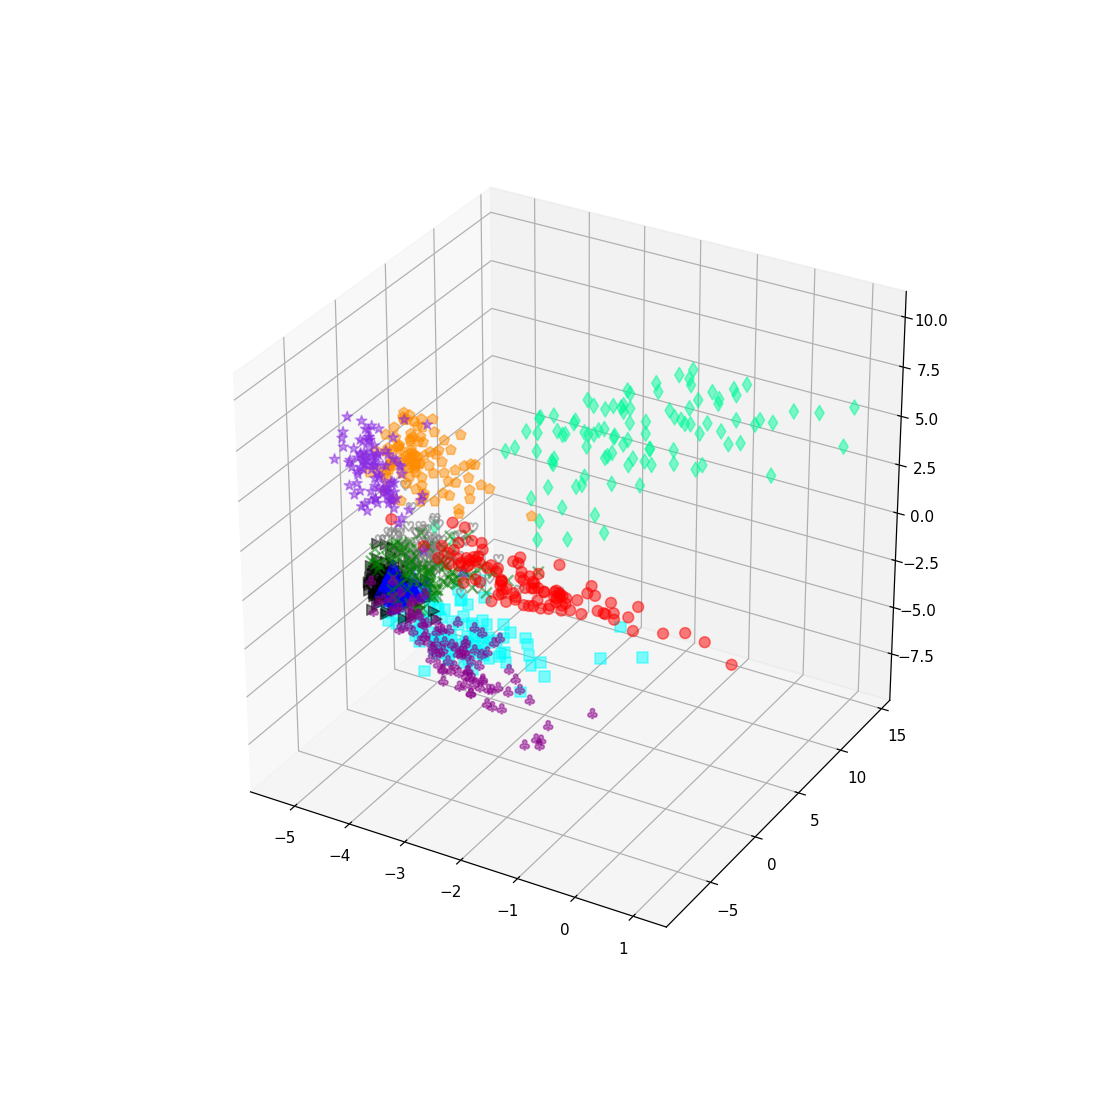

<IPython.core.display.Javascript object>


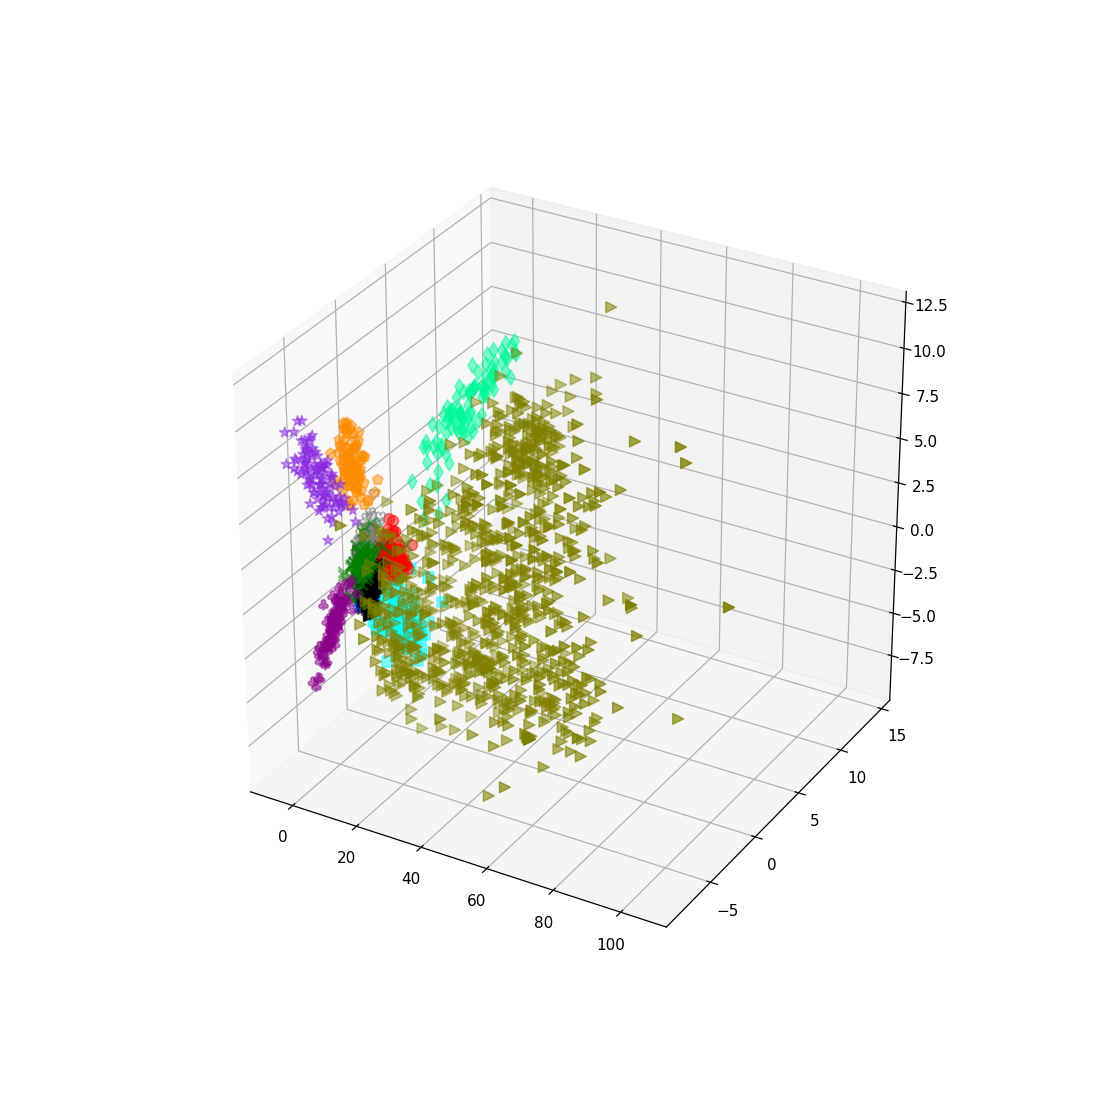

In [22]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data_CNNDu[i*800:(i+1)*800:8,0],pca_data_CNNDu[i*800:(i+1)*800:8,1],pca_data_CNNDu[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label='clean_'+str(i))
    

    

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data_CNNDu[i*800:(i+1)*800:8,0],pca_data_CNNDu[i*800:(i+1)*800:8,1],pca_data_CNNDu[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label='clean_'+str(i))

ax.scatter(pca_data_dustbin_CNNDu[:,0],pca_data_dustbin_CNNDu[:,1], pca_data_dustbin_CNNDu[:,2],
           c='olive',  marker=this_marker, s=50, label='out-dist')



<IPython.core.display.Javascript object>


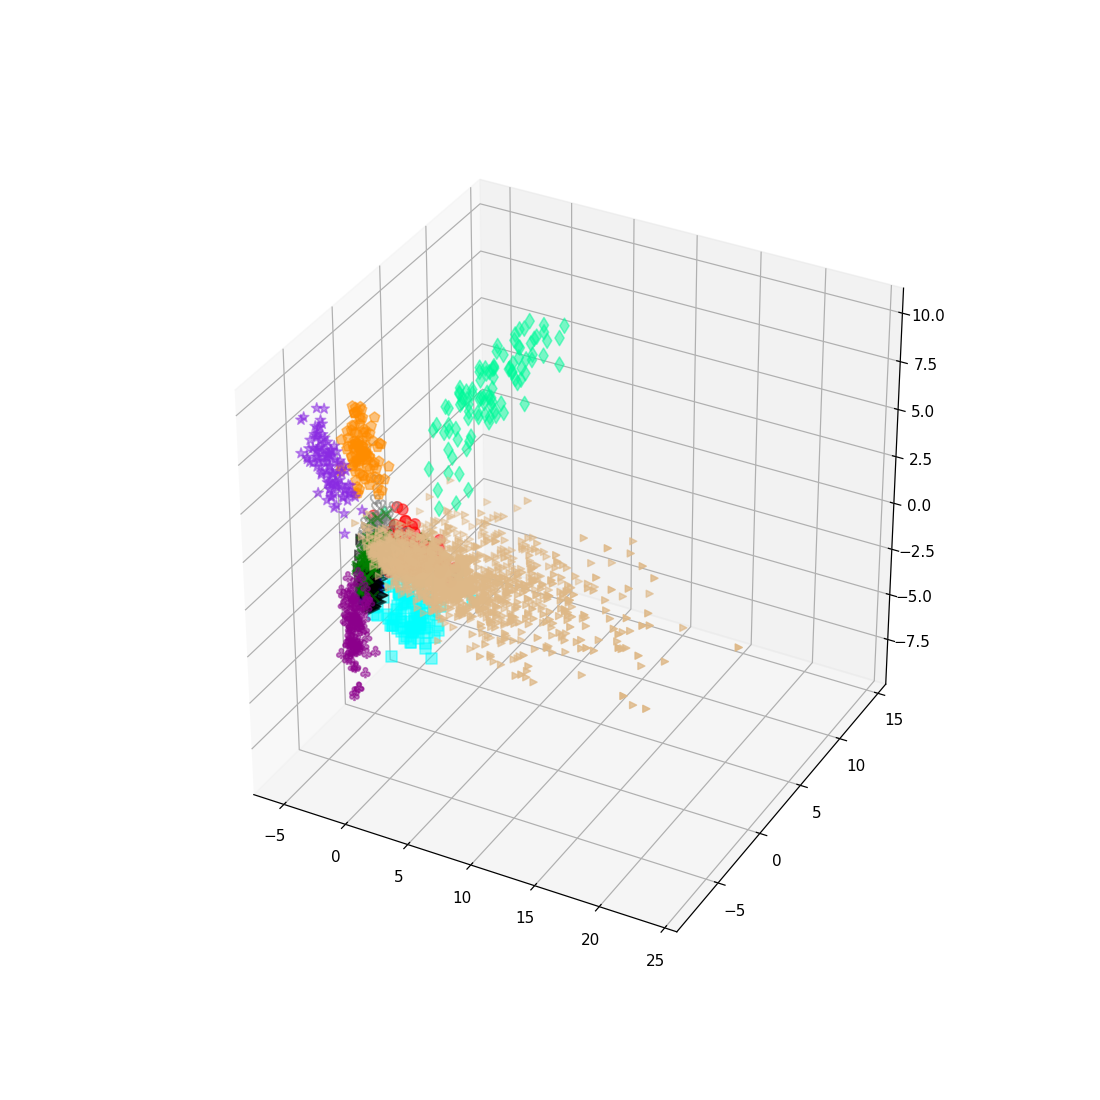

<IPython.core.display.Javascript object>


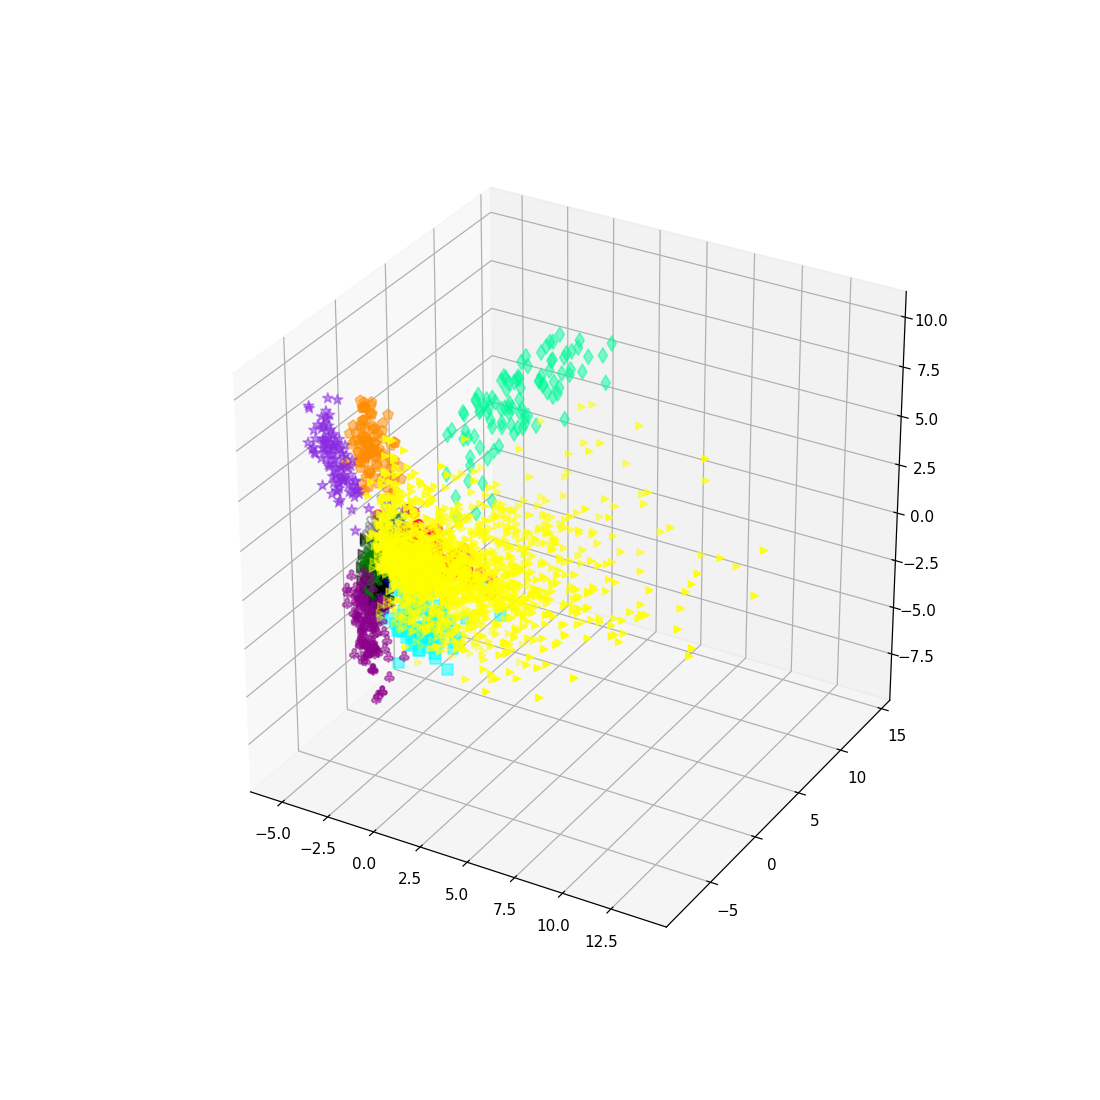

In [23]:

All_TFGS_ConvDus = np.load('MNIST-TFGS-featureSpace-AugmCNN.npy')
All_FGS_ConvDus = np.load('MNIST-FGS-featureSpace-AugmCNN.npy')

pca_all_fgs = pca_fun_CNNDu.transform(All_FGS_ConvDus)
pca_all_tfgs = pca_fun_CNNDu.transform(All_TFGS_ConvDus)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data_CNNDu[i*800:(i+1)*800:8,0],pca_data_CNNDu[i*800:(i+1)*800:8,1],pca_data_CNNDu[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label='clean_'+str(i))

ax.scatter(pca_all_tfgs[::4,0],pca_all_tfgs[::4,1], pca_all_tfgs[::4,2],marker=this_marker, color='burlywood', label='TFGS')



fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
for i in range(10):
    this_marker = (marker_dictionary[i])
    color = to_rgb(color_dictionary[i])
    ax.scatter(pca_data_CNNDu[i*800:(i+1)*800:8,0],pca_data_CNNDu[i*800:(i+1)*800:8,1],pca_data_CNNDu[i*800:(i+1)*800:8,2],\
               c=color, alpha=0.5, s=50,marker = this_marker, label='clean_'+str(i))
ax.scatter(pca_all_fgs[::4,0],pca_all_fgs[::4,1], pca_all_fgs[::4,2],marker=this_marker, color='yellow', label='FGS')
